# Logistic Regression from Scratch

## In this code i implement Logistic Regression from scratch and compare it the model from sklearn

In [731]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Import and Read the Data

In [733]:
# reading the dataset which i got from kaggle its a breast cancer dataset
df = pd.read_csv("Cancer_Data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [734]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [735]:
# removing unneccesary columns using drop method
df = df.drop(columns=["id","Unnamed: 32"])
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [736]:
# changing the diagnosis to binary values for ease
df["diagnosis"] = df["diagnosis"].map({"M":1,"B":0})

In [737]:
# checking if its binary or not
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


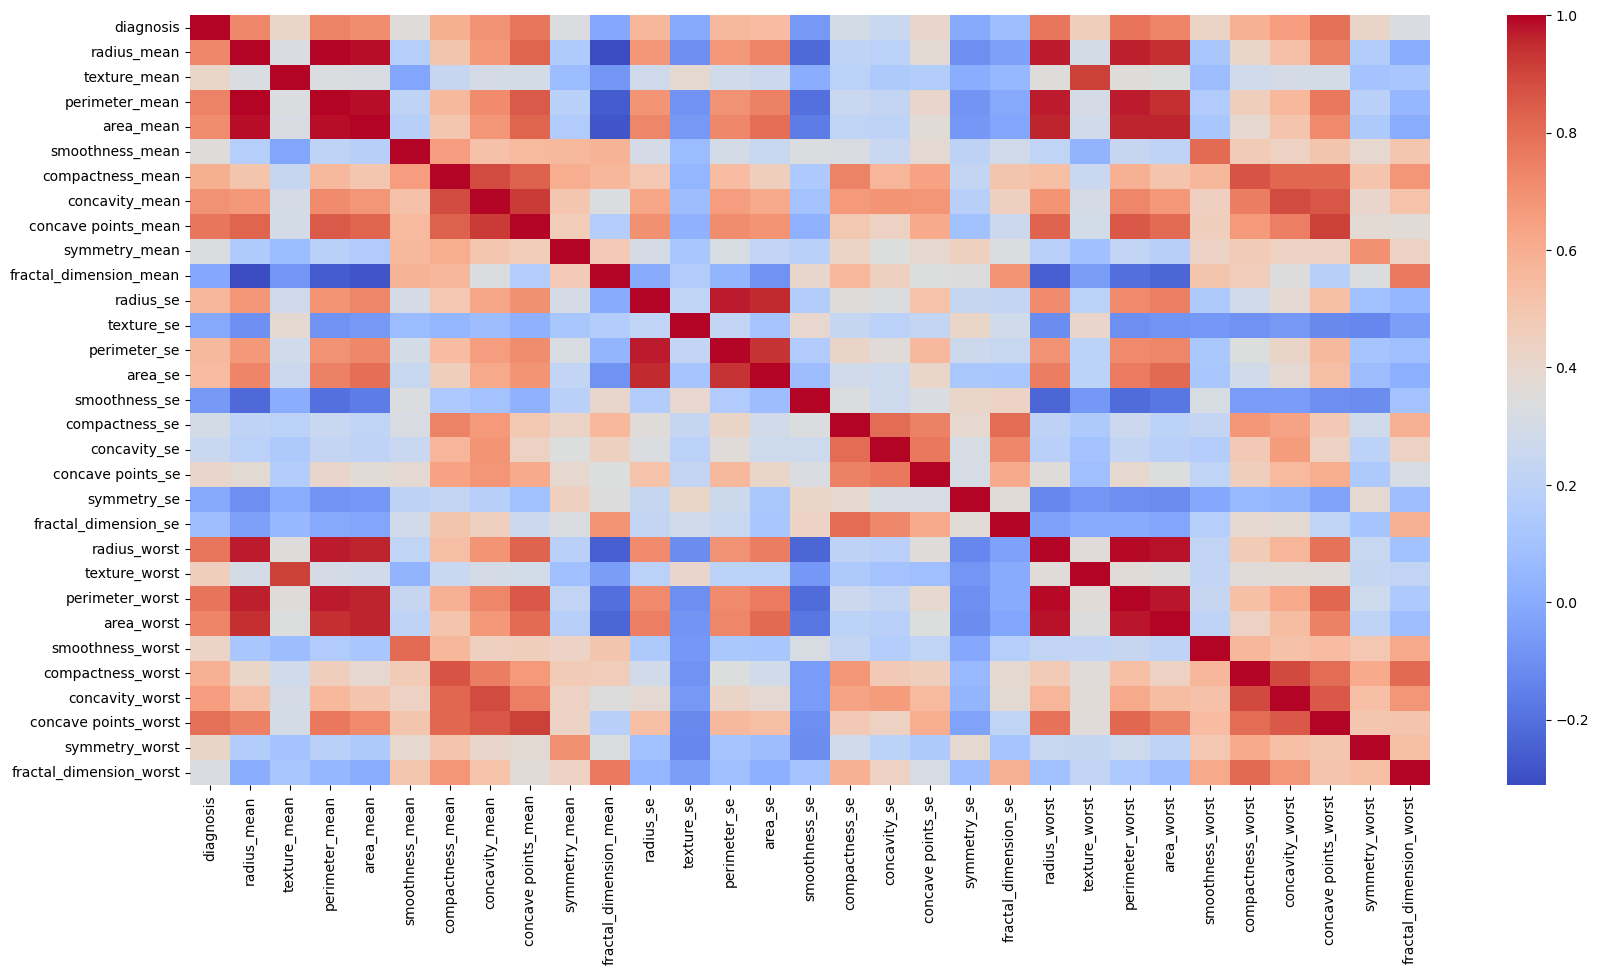

In [738]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(),cmap="coolwarm")
plt.show()

In [739]:
# setting our feature and data
# i am using only two features so that we can easily visualise the algorithm
X = df[["radius_mean","perimeter_se"]].values
y = df["diagnosis"].values

## Normalising the features

In [741]:
X = (X-np.mean(X,axis=0))/(np.std(X,axis=0))


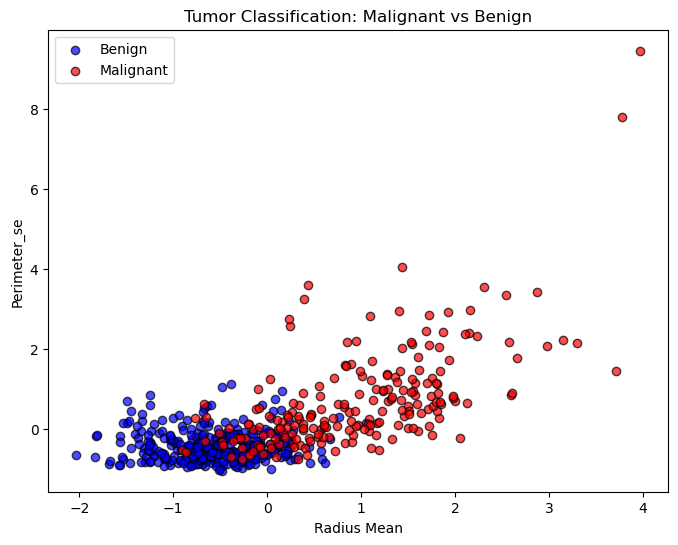

In [742]:
plt.figure(figsize=(8,6))
plt.scatter(X[y==0,0],X[y==0,1],color="blue",label="Benign",edgecolors="k",alpha=0.7)
plt.scatter(X[y==1,0],X[y==1,1],color="red",label="Malignant",edgecolors="k",alpha=0.7)
plt.xlabel("Radius Mean")
plt.ylabel("Perimeter_se")
plt.title("Tumor Classification: Malignant vs Benign")
plt.legend()

plt.show()

# Modelling 

## Sigmoid function

In [745]:
# sigmoid function so we can have 0<x<1 outputs
def sigmoid(z):
    return (1/(1 + np.exp(-z)))

## Computing Loss Function

In [747]:
# calculating the cost
def loss_func(X,y,w,b):
    m = X.shape[0]
    h = sigmoid(np.dot(X,w) + b)
    cost = (-1/m)*np.sum(y*np.log(h) + (1-y)*np.log(1-h))
    return cost
    


## Computing Gradient Descent 

In [749]:
# performing Gradient Descent
def gradient_descent(X,y,alpha,iterations):
    m,n = X.shape
    y = y.reshape(-1,1)
    # initialize weights and biases
    w = np.zeros((n,1))
    b = 0

    #cost_list
    j= []

    for i in range(iterations):
        h = sigmoid(np.dot(X,w)+b)
        d_w = (1/m)*np.dot(X.T,(h-y))
        d_b = (1/m)*np.sum(h-y)

        w -= alpha*d_w
        b -= alpha*d_b

        j.append(loss_func(X,y,w,b))
    return w,b,j
    

## Traning the model

In [751]:
w,b,j = gradient_descent(X,y,alpha=0.01,iterations=30000)

## Decision Boundary Line

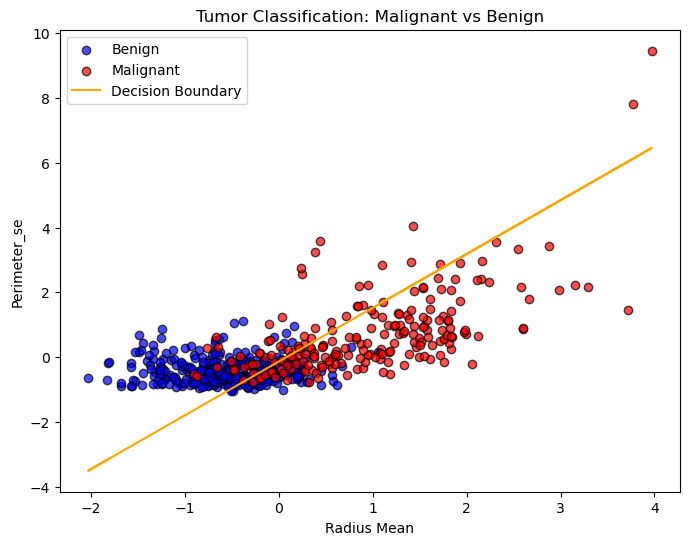

In [753]:
# ploting graph with decision boundary
plt.figure(figsize=(8,6))
plt.scatter(X[y==0,0],X[y==0,1],color="blue",label="Benign",edgecolors="k",alpha=0.7)
plt.scatter(X[y==1,0],X[y==1,1],color="red",label="Malignant",edgecolors="k",alpha=0.7)
plt.plot(X[:,0],((w[0]*X[:,0]+b)/w[1]),color="orange",label="Decision Boundary")
plt.xlabel("Radius Mean")
plt.ylabel("Perimeter_se")
plt.title("Tumor Classification: Malignant vs Benign")
plt.legend()
plt.show()



## Model Evaluation

In [755]:
def accuracy(X,w,b,y):
    h = sigmoid(np.dot(X,w)+b)
    pred_class = []
    pred_class = [1 if i >0.5 else 0 for i in h]
    accuracy = np.sum(y==pred_class)/len(y)
    return print(f"the accuracy is : {accuracy*100}%")
accuracy(X,w,b,y)

    

the accuracy is : 89.80667838312829%


# Model from Sklearn

we will use the in built packages and compare it to our model

In [758]:
#import packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#call the model and apply the traning set
model = LogisticRegression(solver="newton-cg",C=1,random_state=42)
model.fit(X,y)
score = model.score(X,y)

print("Train Accuracy", score*100,"%")

Train Accuracy 89.98242530755711 %


the model has a similar accuracy!

## Decision Boundary line using Sklearn

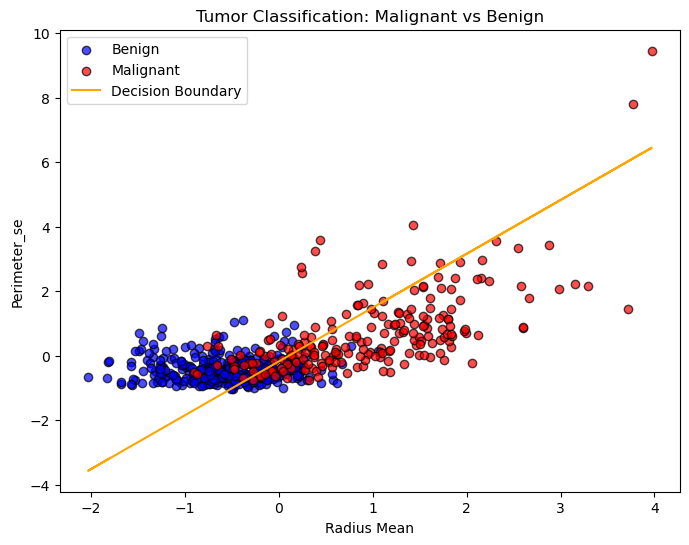

In [760]:
# retrive the intercept and gradients
b = model.intercept_[0]
w1,w2 = model.coef_.T
# ploting graph with decision boundary
plt.figure(figsize=(8,6))
plt.scatter(X[y==0,0],X[y==0,1],color="blue",label="Benign",edgecolors="k",alpha=0.7)
plt.scatter(X[y==1,0],X[y==1,1],color="red",label="Malignant",edgecolors="k",alpha=0.7)
plt.plot(X[:,0],((w1*X[:,0]+b)/w2),color="orange",label="Decision Boundary")
plt.xlabel("Radius Mean")
plt.ylabel("Perimeter_se")
plt.title("Tumor Classification: Malignant vs Benign")
plt.legend()
plt.show()

